<a href="https://colab.research.google.com/github/arunprakash-192IT116/computer-vision/blob/main/Kangaroo_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ahmedfgad/Mask-RCNN-TF2.git

Cloning into 'Mask-RCNN-TF2'...
remote: Enumerating objects: 1434, done.
remote: Total 1434 (delta 0), reused 0 (delta 0), pack-reused 1434
Receiving objects: 100% (1434/1434), 144.54 MiB | 25.10 MiB/s, done.
Resolving deltas: 100% (802/802), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install -r '/content/drive/MyDrive/DATA SCIENCE LAB/codebugged-AI-placement-project/requirements.txt'

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
pip install keras==2.1.0

  Using cached Keras-2.1.0-py2.py3-none-any.whl (302 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


In [ ]:
import os
import skimage
import sys

import mrcnn
import mrcnn.utils
import mrcnn.config
import mrcnn.model
from numpy import zeros, asarray
import mrcnn
import mrcnn.visualize
import cv2
import os



ROOT_DIR = os.path.abspath("/content/Mask-RCNN-TF2")
sys.path.append(ROOT_DIR)
sys.path
from skimage.io import imread
from skimage.transform import resize

In [ ]:
class KangarooConfig(mrcnn.config.Config):
    NAME = "kangaroo_cfg"

    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
    NUM_CLASSES = 2
    
    LEARNING_RATE = 0.001

    STEPS_PER_EPOCH = 131    

In [ ]:
kangaroo_config = KangarooConfig()

In [ ]:
model = mrcnn.model.MaskRCNN(mode='training', 
                             model_dir='./log', 
                             config=kangaroo_config)
model.keras_model.summary()






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d_1[0][0

In [ ]:
model.load_weights(filepath='/content/drive/MyDrive/DATA SCIENCE LAB/codebugged-AI-placement-project/mask_rcnn_coco.h5', 
                   by_name=True, 
                   exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])
print("Weights loaded!")







Weights loaded!


In [ ]:
CLASS_NAMES = ['BG', 'kangaroo']

class SimpleConfig(mrcnn.config.Config):
    NAME = "coco_inference"
    
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    NUM_CLASSES = len(CLASS_NAMES)

In [ ]:
image = cv2.imread("/content/drive/MyDrive/DATA SCIENCE LAB/codebugged-AI-placement-project/download.jpg")
#image = cv2.imread("/content/pexels-photo-1222271.webp")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
model = mrcnn.model.MaskRCNN(mode="inference", 
                             config=SimpleConfig(),
                             model_dir=os.getcwd())

model.load_weights(filepath="/content/drive/MyDrive/DATA SCIENCE LAB/codebugged-AI-placement-project/Kangaroo_mask_rcnn (1).h5", 
                   by_name=True)


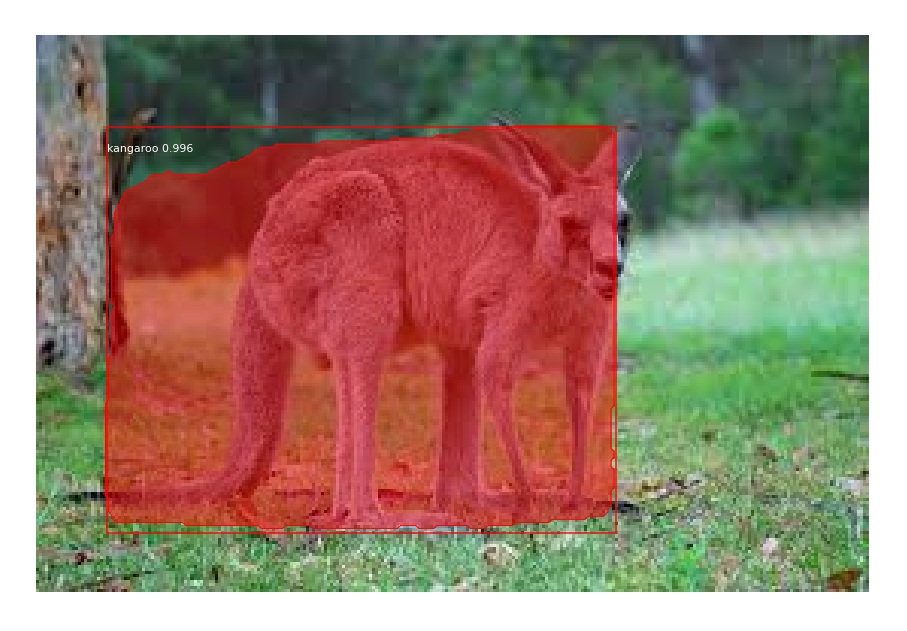

In [ ]:
r = model.detect([image], verbose=0)

r = r[0]

mrcnn.visualize.display_instances(image=image, 
                                  boxes=r['rois'], 
                                  masks=r['masks'], 
                                  class_ids=r['class_ids'], 
                                  class_names=CLASS_NAMES, 
                                  scores=r['scores'])

In [ ]:
image = cv2.imread("/content/drive/MyDrive/DATA SCIENCE LAB/codebugged-AI-placement-project/istockphoto-105097179-612x612 (1).jpg")
#image = cv2.imread("/content/pexels-photo-1222271.webp")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

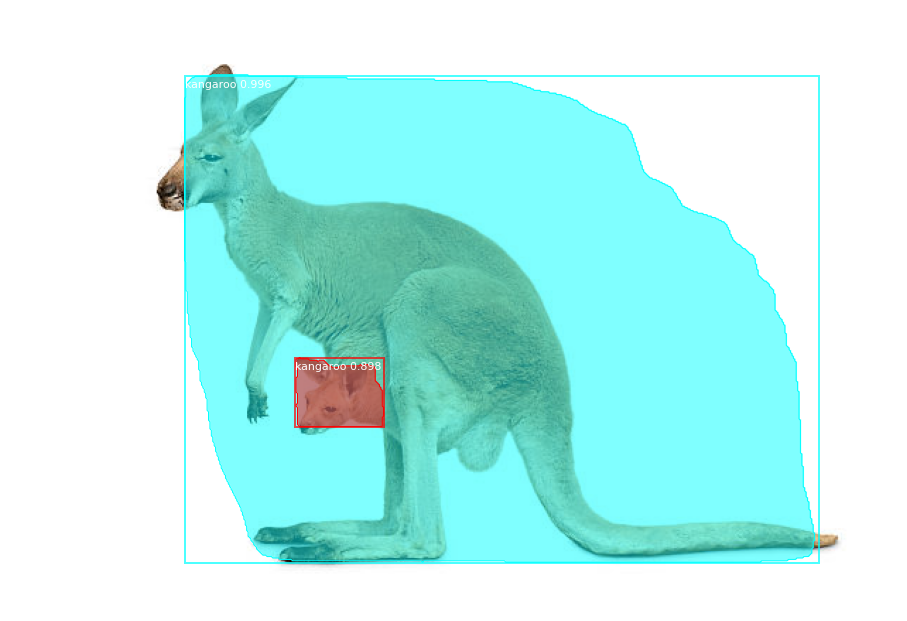

In [ ]:
r = model.detect([image], verbose=0)

r = r[0]

mrcnn.visualize.display_instances(image=image, 
                                  boxes=r['rois'], 
                                  masks=r['masks'], 
                                  class_ids=r['class_ids'], 
                                  class_names=CLASS_NAMES, 
                                  scores=r['scores'])

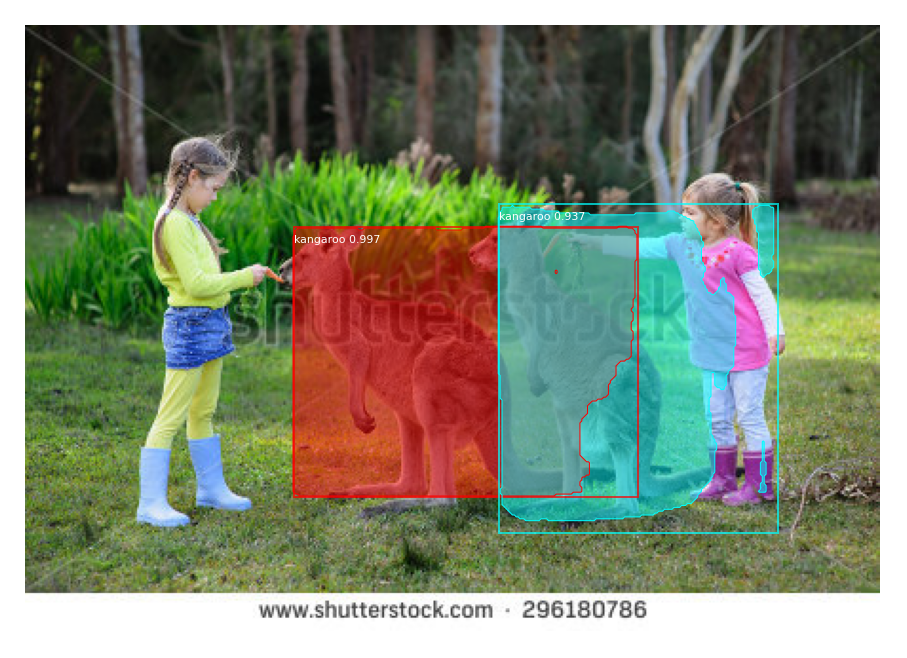

In [ ]:

image = cv2.imread("/content/drive/MyDrive/DATA SCIENCE LAB/codebugged-AI-placement-project/00001.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
r = model.detect([image], verbose=0)

r = r[0]

mrcnn.visualize.display_instances(image=image, 
                                  boxes=r['rois'], 
                                  masks=r['masks'], 
                                  class_ids=r['class_ids'], 
                                  class_names=CLASS_NAMES, 
                                  scores=r['scores'])

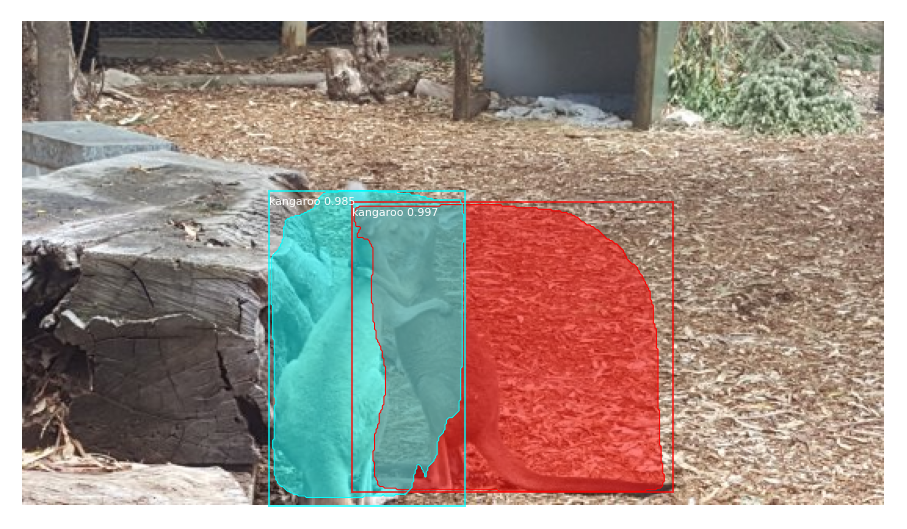

In [ ]:
image = cv2.imread("/content/drive/MyDrive/DATA SCIENCE LAB/codebugged-AI-placement-project/00002.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
r = model.detect([image], verbose=0)

r = r[0]

mrcnn.visualize.display_instances(image=image, 
                                  boxes=r['rois'], 
                                  masks=r['masks'], 
                                  class_ids=r['class_ids'], 
                                  class_names=CLASS_NAMES, 
                                  scores=r['scores'])

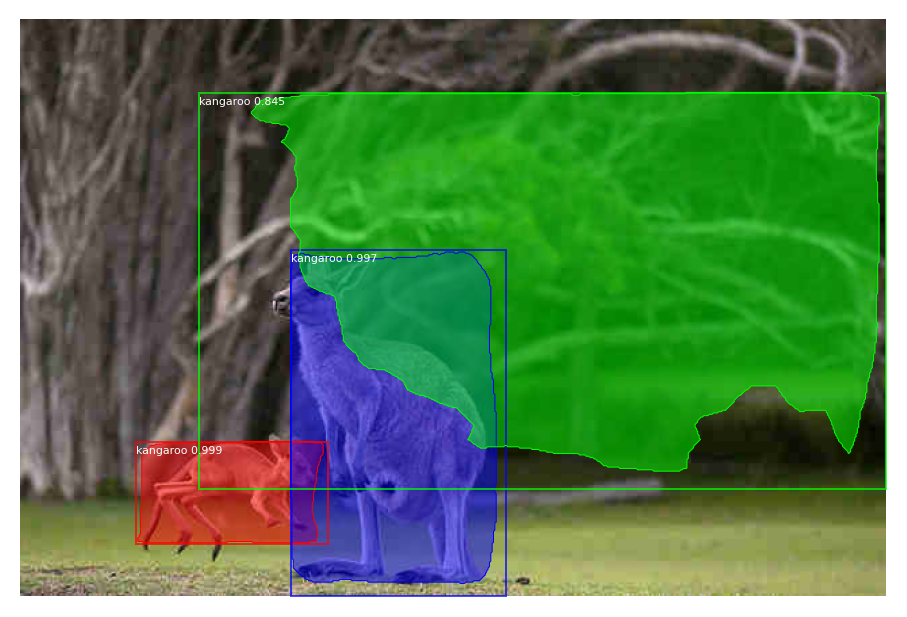

In [ ]:
image = cv2.imread("/content/drive/MyDrive/DATA SCIENCE LAB/codebugged-AI-placement-project/00006.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
r = model.detect([image], verbose=0)

r = r[0]

mrcnn.visualize.display_instances(image=image, 
                                  boxes=r['rois'], 
                                  masks=r['masks'], 
                                  class_ids=r['class_ids'], 
                                  class_names=CLASS_NAMES, 
                                  scores=r['scores'])

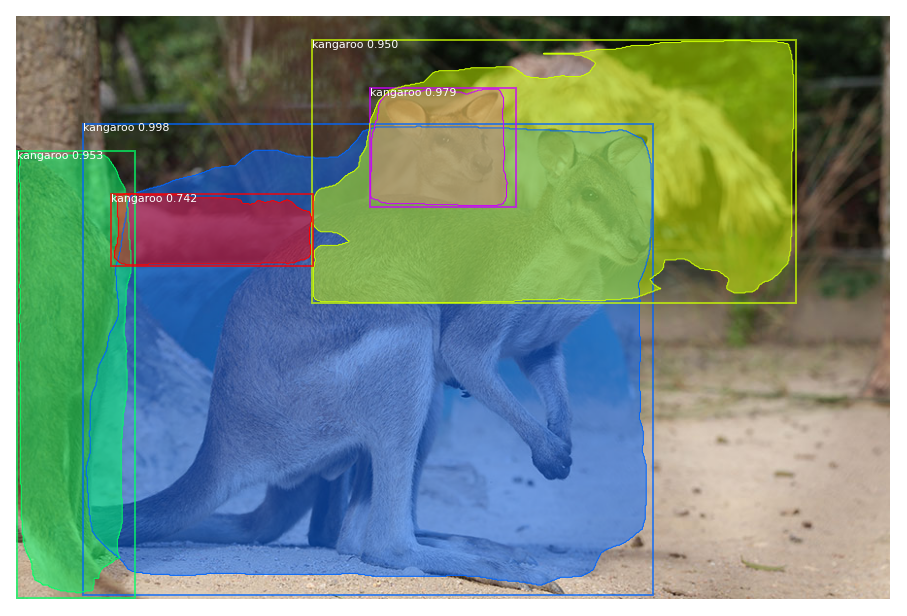

In [ ]:
image = cv2.imread("/content/drive/MyDrive/DATA SCIENCE LAB/codebugged-AI-placement-project/00010.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
r = model.detect([image], verbose=0)

r = r[0]

mrcnn.visualize.display_instances(image=image, 
                                  boxes=r['rois'], 
                                  masks=r['masks'], 
                                  class_ids=r['class_ids'], 
                                  class_names=CLASS_NAMES, 
                                  scores=r['scores'])

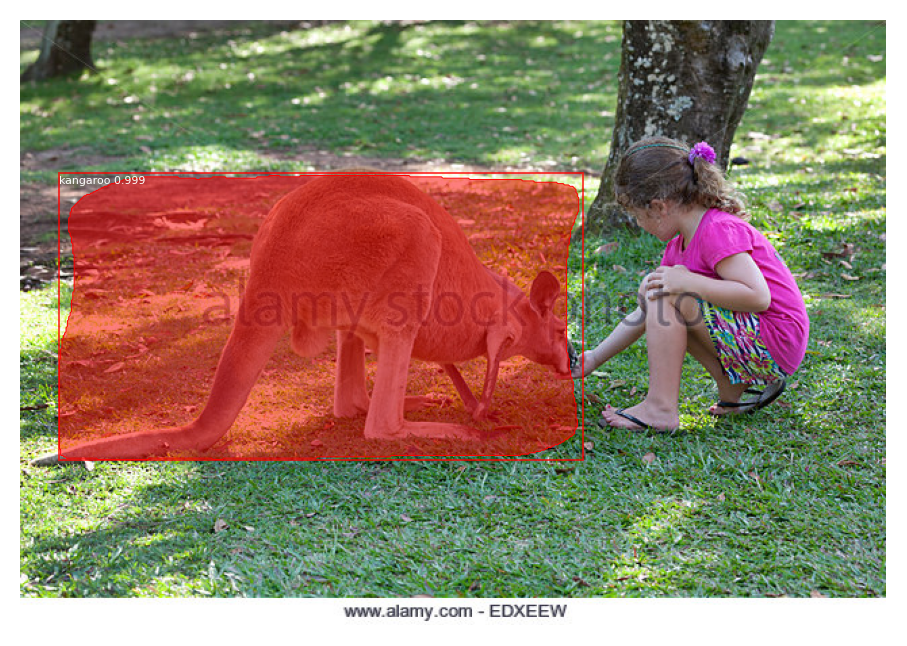

In [ ]:
image = cv2.imread("/content/drive/MyDrive/DATA SCIENCE LAB/codebugged-AI-placement-project/00011.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
r = model.detect([image], verbose=0)

r = r[0]

mrcnn.visualize.display_instances(image=image, 
                                  boxes=r['rois'], 
                                  masks=r['masks'], 
                                  class_ids=r['class_ids'], 
                                  class_names=CLASS_NAMES, 
                                  scores=r['scores'])

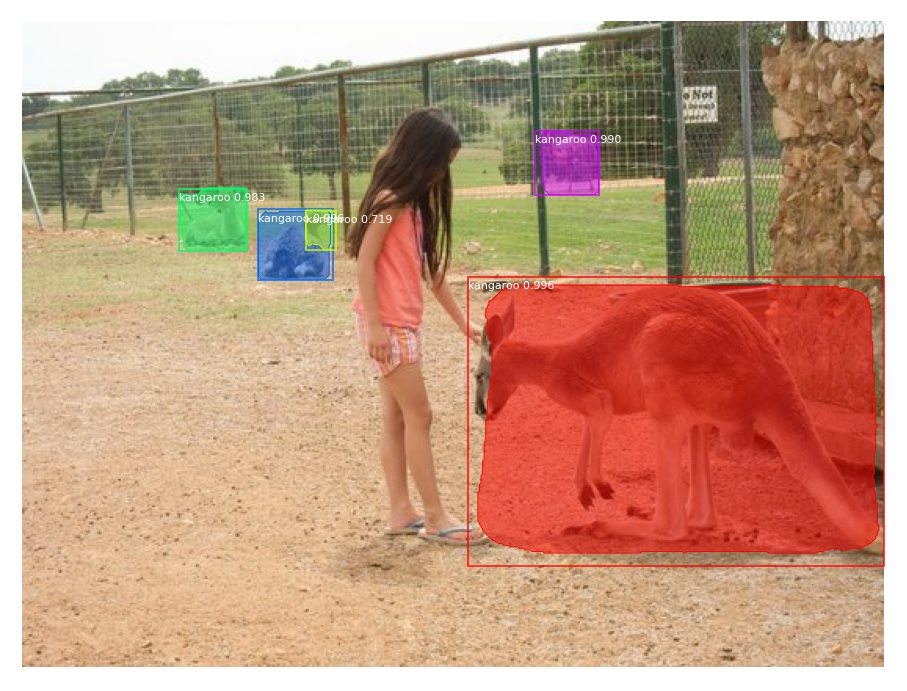

In [ ]:
image = cv2.imread("/content/drive/MyDrive/DATA SCIENCE LAB/codebugged-AI-placement-project/00012.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
r = model.detect([image], verbose=0)

r = r[0]

mrcnn.visualize.display_instances(image=image, 
                                  boxes=r['rois'], 
                                  masks=r['masks'], 
                                  class_ids=r['class_ids'], 
                                  class_names=CLASS_NAMES, 
                                  scores=r['scores'])

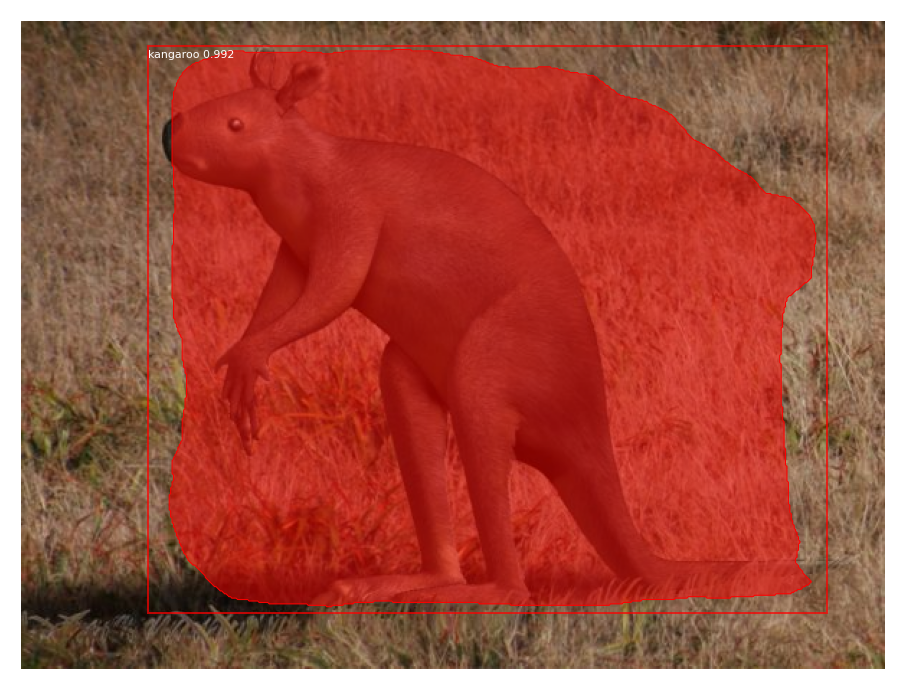

In [ ]:
image = cv2.imread("/content/drive/MyDrive/DATA SCIENCE LAB/codebugged-AI-placement-project/00016.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
r = model.detect([image], verbose=0)

r = r[0]

mrcnn.visualize.display_instances(image=image, 
                                  boxes=r['rois'], 
                                  masks=r['masks'], 
                                  class_ids=r['class_ids'], 
                                  class_names=CLASS_NAMES, 
                                  scores=r['scores'])

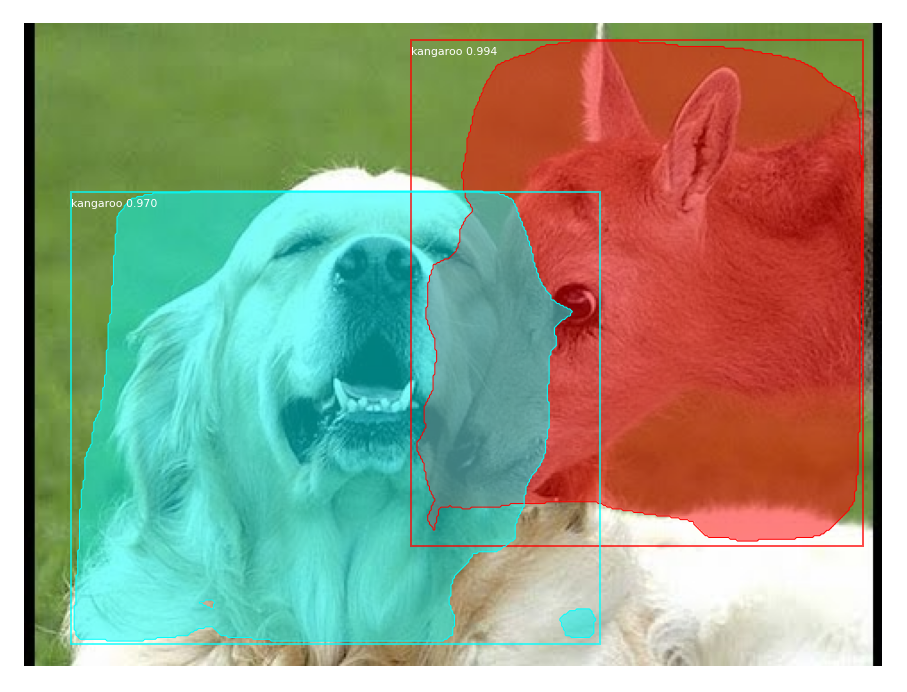

In [ ]:
image = cv2.imread("/content/drive/MyDrive/DATA SCIENCE LAB/codebugged-AI-placement-project/00018.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
r = model.detect([image], verbose=0)

r = r[0]

mrcnn.visualize.display_instances(image=image, 
                                  boxes=r['rois'], 
                                  masks=r['masks'], 
                                  class_ids=r['class_ids'], 
                                  class_names=CLASS_NAMES, 
                                  scores=r['scores'])